In [21]:
import pandas as pd
import numpy as np
import re
from afinn import Afinn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv("Elon_musk (1).csv", encoding = 'cp1252')
data.head()

Unnamed: 0                                               Text
0           1                             @kunalb11 I’m an alien
1           2  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2           3                @joerogan @Spotify Great interview!
3           4                    @gtera27 Doge is underestimated
4           5  @teslacn Congratulations Tesla China for amazi...

In [23]:
data = data.drop('Unnamed: 0', axis = 1)

In [24]:
data.Text = data.Text.apply(lambda x: re.sub('[^a-zA-Z_@ ]', " ", x))

In [25]:
data.head()

Text
0                             @kunalb   I m an alien
1  @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                @joerogan @Spotify Great interview 
3                    @gtera   Doge is underestimated
4  @teslacn Congratulations Tesla China for amazi...

### Data Preprocessing

In [26]:
data.Text = data.Text.apply(lambda x: x.split())

In [27]:
data.head()

Text
0                         [@kunalb, I, m, an, alien]
1  [@ID_AA_Carmack, Ray, tracing, on, Cyberpunk, ...
2            [@joerogan, @Spotify, Great, interview]
3                 [@gtera, Doge, is, underestimated]
4  [@teslacn, Congratulations, Tesla, China, for,...

#### Removing the Usernames (@)

In [28]:
data.Text = data.Text.apply(lambda x: [word for word in x if word.find('@') == -1])

In [29]:
data.head()

Text
0                                  [I, m, an, alien]
1  [Ray, tracing, on, Cyberpunk, with, HDR, is, n...
2                                 [Great, interview]
3                         [Doge, is, underestimated]
4  [Congratulations, Tesla, China, for, amazing, ...

In [30]:
data.Text[1444]

['No',
 'we',
 're',
 'focused',
 'on',
 'developing',
 'new',
 'products',
 'amp',
 'scaling',
 'production']

In [31]:
data.Text = data.Text.apply(lambda x: " ".join(x))

In [32]:
data.head(5)

Text
0                                       I m an alien
1  Ray tracing on Cyberpunk with HDR is next leve...
2                                    Great interview
3                             Doge is underestimated
4  Congratulations Tesla China for amazing execut...

#### converting all the text to lower case

In [33]:
data.Text = data.Text.apply(lambda x: x.lower())

In [34]:
data.head()

Text
0                                       i m an alien
1  ray tracing on cyberpunk with hdr is next leve...
2                                    great interview
3                             doge is underestimated
4  congratulations tesla china for amazing execut...

#### Importing Stopwords file

In [35]:
stop = open('stop.txt', 'r')

In [36]:
stop_words = []
for i in stop:
    stop_words.append(i)

In [37]:
new_SW = []
for i in range(571):
    a = stop_words[i][:-1]
    new_SW.append(a)

In [38]:
new_SW

['a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [39]:
data.Text = data.Text.apply(lambda x: x.split())

In [40]:
data.Text = data.Text.apply(lambda x: [word for word in x if word not in new_SW])

In [41]:
data.head()

Text
0                                            [alien]
1              [ray, tracing, cyberpunk, hdr, level]
2                                 [great, interview]
3                             [doge, underestimated]
4  [congratulations, tesla, china, amazing, execu...

#### Importing Positive words file

In [42]:
positive = open('positive-words.txt', 'r')

In [43]:
pos_words = []
for i in positive:
    pos_words.append(i)

In [44]:
positive_words = []
for i in range(2006):
    a = pos_words[i][:-1]
    positive_words.append(a)

In [45]:
positive_words

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an opi

#### Getting Scores for Positive words in data

In [46]:
afn = Afinn()

In [47]:
data['positive'] = data.Text.apply(lambda x: [afn.score(word) for word in x if word in positive_words])

In [48]:
for i in range(1999):
    data['positive'][i] = sum(data.positive[i])

In [49]:
data.head()

Text positive
0                                            [alien]        0
1              [ray, tracing, cyberpunk, hdr, level]        0
2                                 [great, interview]      3.0
3                             [doge, underestimated]        0
4  [congratulations, tesla, china, amazing, execu...      6.0

<AxesSubplot:xlabel='positive', ylabel='Density'>

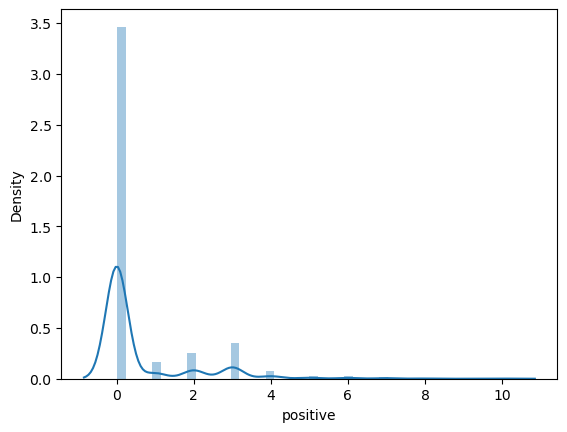

In [50]:
sns.distplot(data['positive'])

#### Importing Negative words file

In [51]:
negative_txt = open('negative-words.txt', 'r')
neg_words = []
for i in negative_txt:
    neg_words.append(i)

In [52]:
negative_words = []
for i in range(4783):
    a = neg_words[i][:-1]
    negative_words.append(a)

#### Getting Scores for Negative words in data

In [53]:
data['negative'] = data.Text.apply(lambda x: [afn.score(word) for word in x if word in negative_words])
for i in range(1999):
    data['negative'][i] = sum(data.negative[i])


In [54]:
data

Text positive negative
0                                               [alien]        0        0
1                 [ray, tracing, cyberpunk, hdr, level]        0        0
2                                    [great, interview]      3.0        0
3                                [doge, underestimated]        0        0
4     [congratulations, tesla, china, amazing, execu...      6.0        0
...                                                 ...      ...      ...
1994  [true, sounds, surreal, negative, propaganda, ...      1.0     -4.0
1995  [make, read, ur, terms, amp, conditions, click...        0        0
1996                                  [samwise, gamgee]        0        0
1997                              [altho, dumb, dumber]        0     -3.0
1998                         [progress, update, august]      2.0        0

[1999 rows x 3 columns]

#### final Score for the data by adding positive score and negative score

In [55]:
data['Score'] = 0
for i in range(1999):
    data['Score'][i] = int(data['positive'][i]) + int(data['negative'][i])

In [56]:
data

Text positive negative  \
0                                               [alien]        0        0   
1                 [ray, tracing, cyberpunk, hdr, level]        0        0   
2                                    [great, interview]      3.0        0   
3                                [doge, underestimated]        0        0   
4     [congratulations, tesla, china, amazing, execu...      6.0        0   
...                                                 ...      ...      ...   
1994  [true, sounds, surreal, negative, propaganda, ...      1.0     -4.0   
1995  [make, read, ur, terms, amp, conditions, click...        0        0   
1996                                  [samwise, gamgee]        0        0   
1997                              [altho, dumb, dumber]        0     -3.0   
1998                         [progress, update, august]      2.0        0   

      Score  
0         0  
1         0  
2         3  
3         0  
4         6  
...     ...  
1994     -3  
1995      0  
1996      0  
1997     -3  
1998      2  

[1999 rows x 4 columns]

<AxesSubplot:xlabel='negative', ylabel='Density'>

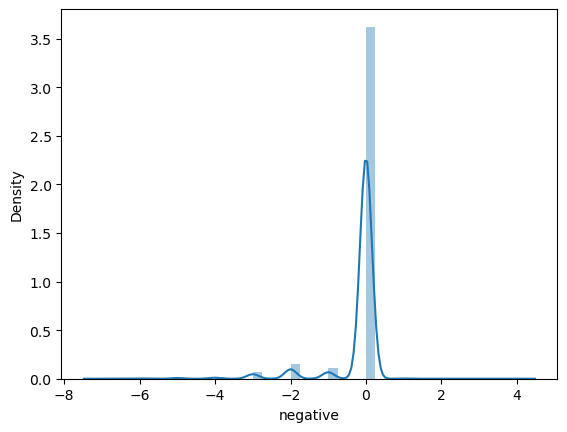

In [57]:
sns.distplot(data['negative'])

#### converting the score into reaction.
##### - positive reaction (1)
##### - negative reaction (-1)
##### - neutral reaction (0)

In [58]:
data['reaction'] = 0
for i in range(1999):
    if data['Score'][i] >= 1:
        data['reaction'][i] = 1
    elif data['Score'][i] < 0:
        data['reaction'][i] = -1
    else:
        data['reaction'][i] = 0

In [59]:
data

Text positive negative  \
0                                               [alien]        0        0   
1                 [ray, tracing, cyberpunk, hdr, level]        0        0   
2                                    [great, interview]      3.0        0   
3                                [doge, underestimated]        0        0   
4     [congratulations, tesla, china, amazing, execu...      6.0        0   
...                                                 ...      ...      ...   
1994  [true, sounds, surreal, negative, propaganda, ...      1.0     -4.0   
1995  [make, read, ur, terms, amp, conditions, click...        0        0   
1996                                  [samwise, gamgee]        0        0   
1997                              [altho, dumb, dumber]        0     -3.0   
1998                         [progress, update, august]      2.0        0   

      Score  reaction  
0         0         0  
1         0         0  
2         3         1  
3         0         0  
4         6         1  
...     ...       ...  
1994     -3        -1  
1995      0         0  
1996      0         0  
1997     -3        -1  
1998      2         1  

[1999 rows x 5 columns]

<AxesSubplot:xlabel='reaction', ylabel='Density'>

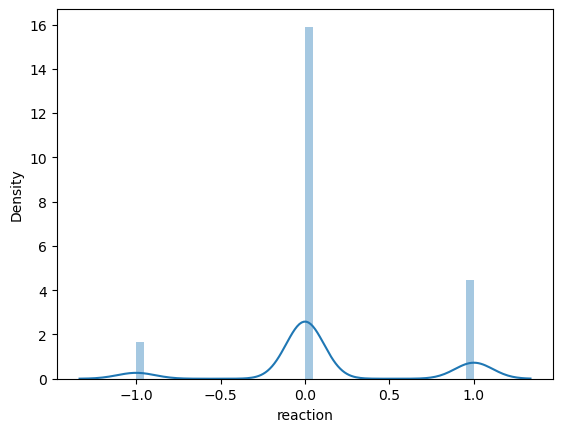

In [60]:
sns.distplot(data['reaction'])

In [61]:
data.Text = data.Text.apply(lambda x: " ".join(x))

In [62]:
data.Text.values

array(['alien', 'ray tracing cyberpunk hdr level', 'great interview', ...,
       'samwise gamgee', 'altho dumb dumber', 'progress update august'],
      dtype=object)

In [63]:
cv = TfidfVectorizer()
X = cv.fit_transform(data.Text.values).toarray()
X=pd.DataFrame(X,columns=cv.get_feature_names())

In [64]:
X

_extrachars   _t  aayypcpp   ab  aber  abo  aboard  abort  absence  \
0             0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
1             0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
2             0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
3             0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
4             0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
...           ...  ...       ...  ...   ...  ...     ...    ...      ...   
1994          0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
1995          0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
1996          0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
1997          0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   
1998          0.0  0.0       0.0  0.0   0.0  0.0     0.0    0.0      0.0   

      absolute  ...  zsyalvczx  ztn  ztrmvq  zugaquvpy  zvm  zxd  zyf  zyj  \
0          0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
1          0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
2          0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
3          0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
4          0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
...        ...  ...        ...  ...     ...        ...  ...  ...  ...  ...   
1994       0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
1995       0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
1996       0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
1997       0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   
1998       0.0  ...        0.0  0.0     0.0        0.0  0.0  0.0  0.0  0.0   

      zynsxisp   zz  
0          0.0  0.0  
1          0.0  0.0  
2          0.0  0.0  
3          0.0  0.0  
4          0.0  0.0  
...        ...  ...  
1994       0.0  0.0  
1995       0.0  0.0  
1996       0.0  0.0  
1997       0.0  0.0  
1998       0.0  0.0  

[1999 rows x 4391 columns]

##### Train-Test Split

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, data.reaction, test_size = 0.3,random_state=10) 

##### Model fitting

In [66]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [67]:
pred = model.predict(X_test)
print(model,"accuracy ::",metrics.accuracy_score(y_test,pred))

DecisionTreeClassifier() accuracy :: 0.88


In [68]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

          -1       0.76      0.38      0.51        50
           0       0.89      0.97      0.93       439
           1       0.86      0.76      0.80       111

    accuracy                           0.88       600
   macro avg       0.84      0.70      0.75       600
weighted avg       0.87      0.88      0.87       600



In [69]:
print(metrics.confusion_matrix(y_test, pred))

[[ 19  29   2]
 [  2 425  12]
 [  4  23  84]]


In [70]:
tweets_text=' '.join(data.Text)
tweets_text[:1000]

'alien ray tracing cyberpunk hdr level great interview doge underestimated congratulations tesla china amazing execution year happy year ox https wfkmyu oj frodo underdoge thought fail https zgxjfdzzrm haha tweets represent real world time allocation entertaining outcome  agree clubhouse https rwe uhsts real bought dogecoin lil toddler hodler issues sentencing bit high fixing unlock account  true power haha https fc uhqsd crypto wallet won give private keys avoided costs app sucks rt nasa selected falcon heavy launch elements lunar gateway mission https pwt  predict cash flow starlink ipo starlink staggeringly difficult technical amp economic endeavor don https ac skqx spacex pass deep chasm negative cash flow year https hdjl lowest cost ton carbon sequestered net product made scalable https xmyi qwsgw meant price countries difference taxes amp shipping intended earth ideas apply mars  xprize team manage carbon capture prize https fsw ianl tesla receives stock comp stock options table 

In [71]:
positive = ' '.join(positive_words)

In [72]:
positive[: 1000]

';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;; ;  ; Opinion Lexicon: Positive ; ; This file contains a list of POSITIVE opinion words (or sentiment words). ; ; This file and the papers can all be downloaded from  ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; If you use this list, please cite one of the following two papers: ; ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."  ;       Proceedings of the ACM SIGKDD International Conference on Knowledge  ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle,  ;       Washington, USA,  ;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing  ;       and Comparing Opinions on the Web." Proceedings of the 14th  ;       International World Wide Web conference (WWW-2005), May 10-14,  ;       2005, Chiba, Japan. ; ; Notes:  ;    1. The appearance of an opinion word in a sentence does not necessarily   ;       mean that the sentence express

In [73]:
negative = ' '.join(negative_words)
negative[: 1000]

';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;; ;  ; Opinion Lexicon: Negative ; ; This file contains a list of NEGATIVE opinion words (or sentiment words). ; ; This file and the papers can all be downloaded from  ;    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html ; ; If you use this list, please cite one of the following two papers: ; ;   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews."  ;       Proceedings of the ACM SIGKDD International Conference on Knowledge  ;       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle,  ;       Washington, USA,  ;   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing  ;       and Comparing Opinions on the Web." Proceedings of the 14th  ;       International World Wide Web conference (WWW-2005), May 10-14,  ;       2005, Chiba, Japan. ; ; Notes:  ;    1. The appearance of an opinion word in a sentence does not necessarily   ;       mean that the sentence expre

In [74]:
stop_word = " ".join(new_SW)
stop_word[: 1000]

"a a's able about above according accordingly across actually after afterwards again against ain't all allow allows almost alone along already also although always am among amongst an and another any anybody anyhow anyone anything anyway anyways anywhere apart appear appreciate appropriate are aren't around as aside ask asking associated at available away awfully b be became because become becomes becoming been before beforehand behind being believe below beside besides best better between beyond both brief but by c c'mon c's came can can't cannot cant cause causes certain certainly changes clearly co com come comes concerning consequently consider considering contain containing contains corresponding could couldn't course currently d definitely described despite did didn't different do does doesn't doing don't done down downwards during e each edu eg eight either else elsewhere enough entirely especially et etc even ever every everybody everyone everything everywhere ex exactly exampl

In [76]:
pip install wordcloud

     -------------------------------------- 153.3/153.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [77]:
from wordcloud import WordCloud

In [78]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

#### Word Cloud for Stop Words

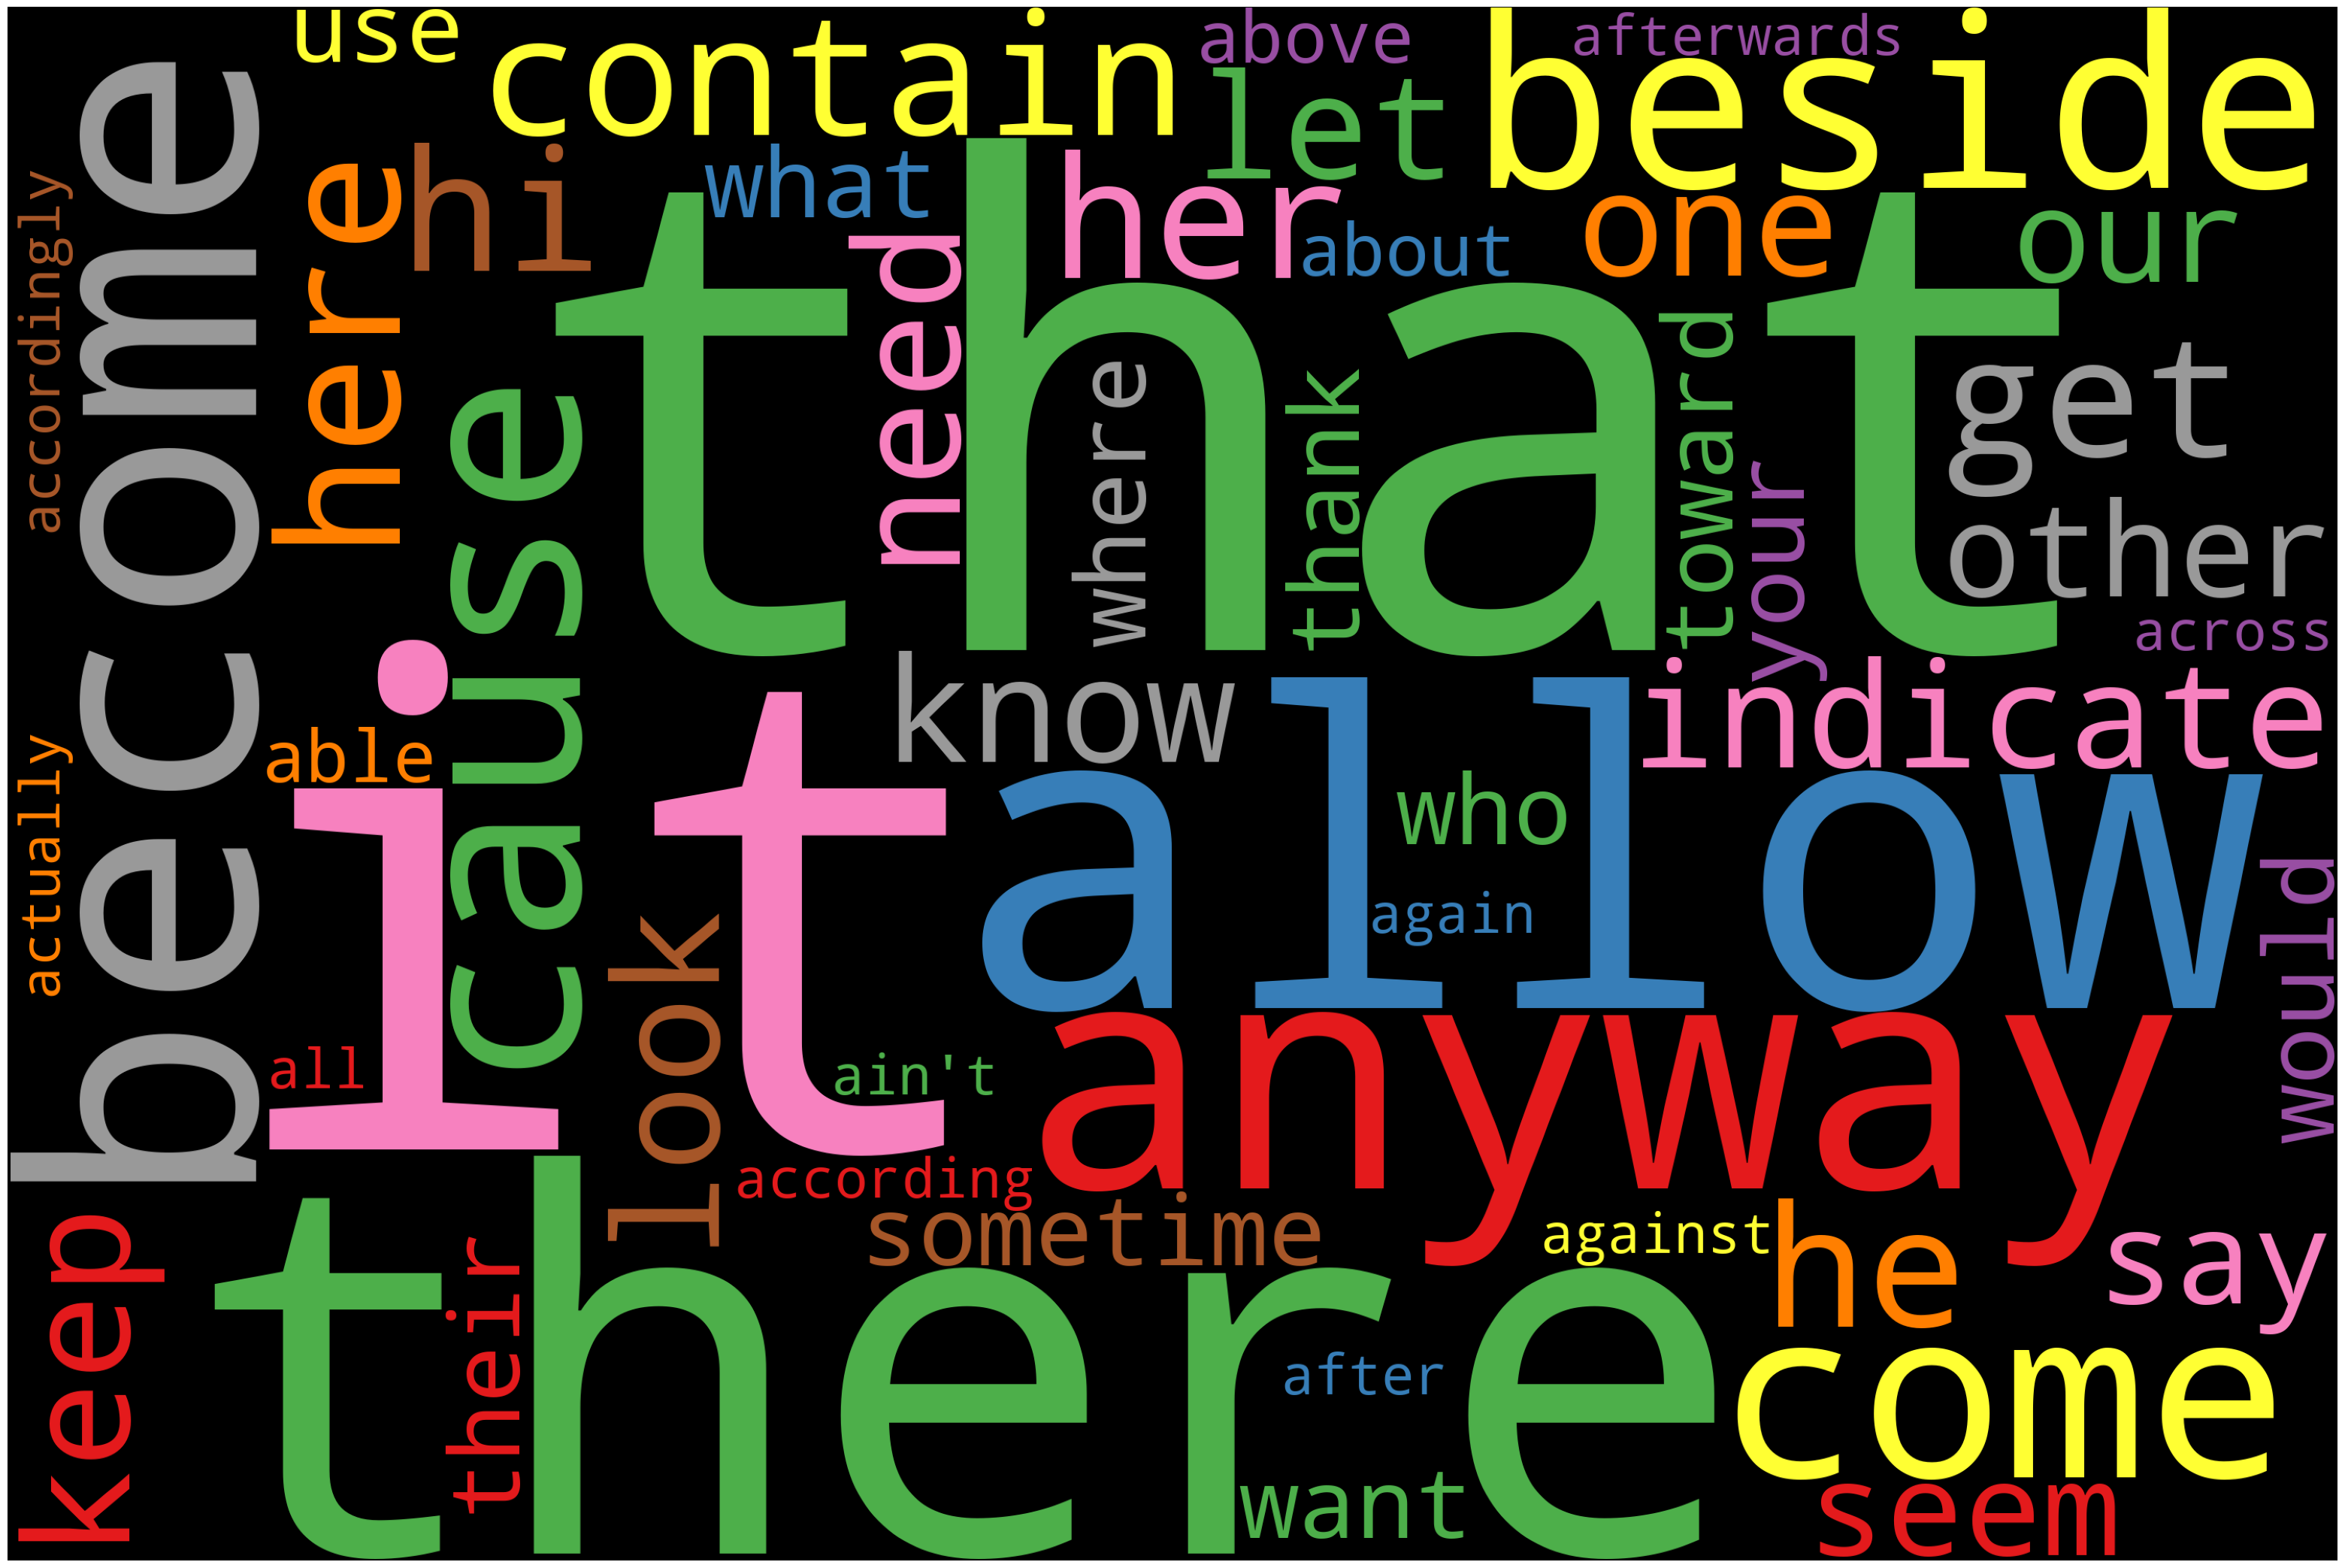

In [79]:
wordcloud=WordCloud(width = 3000, height = 2000, background_color = 'black', max_words = 50,
                   colormap = 'Set1', stopwords = tweets_text).generate(stop_word)
plot_cloud(wordcloud)

#### word cloud for positive words

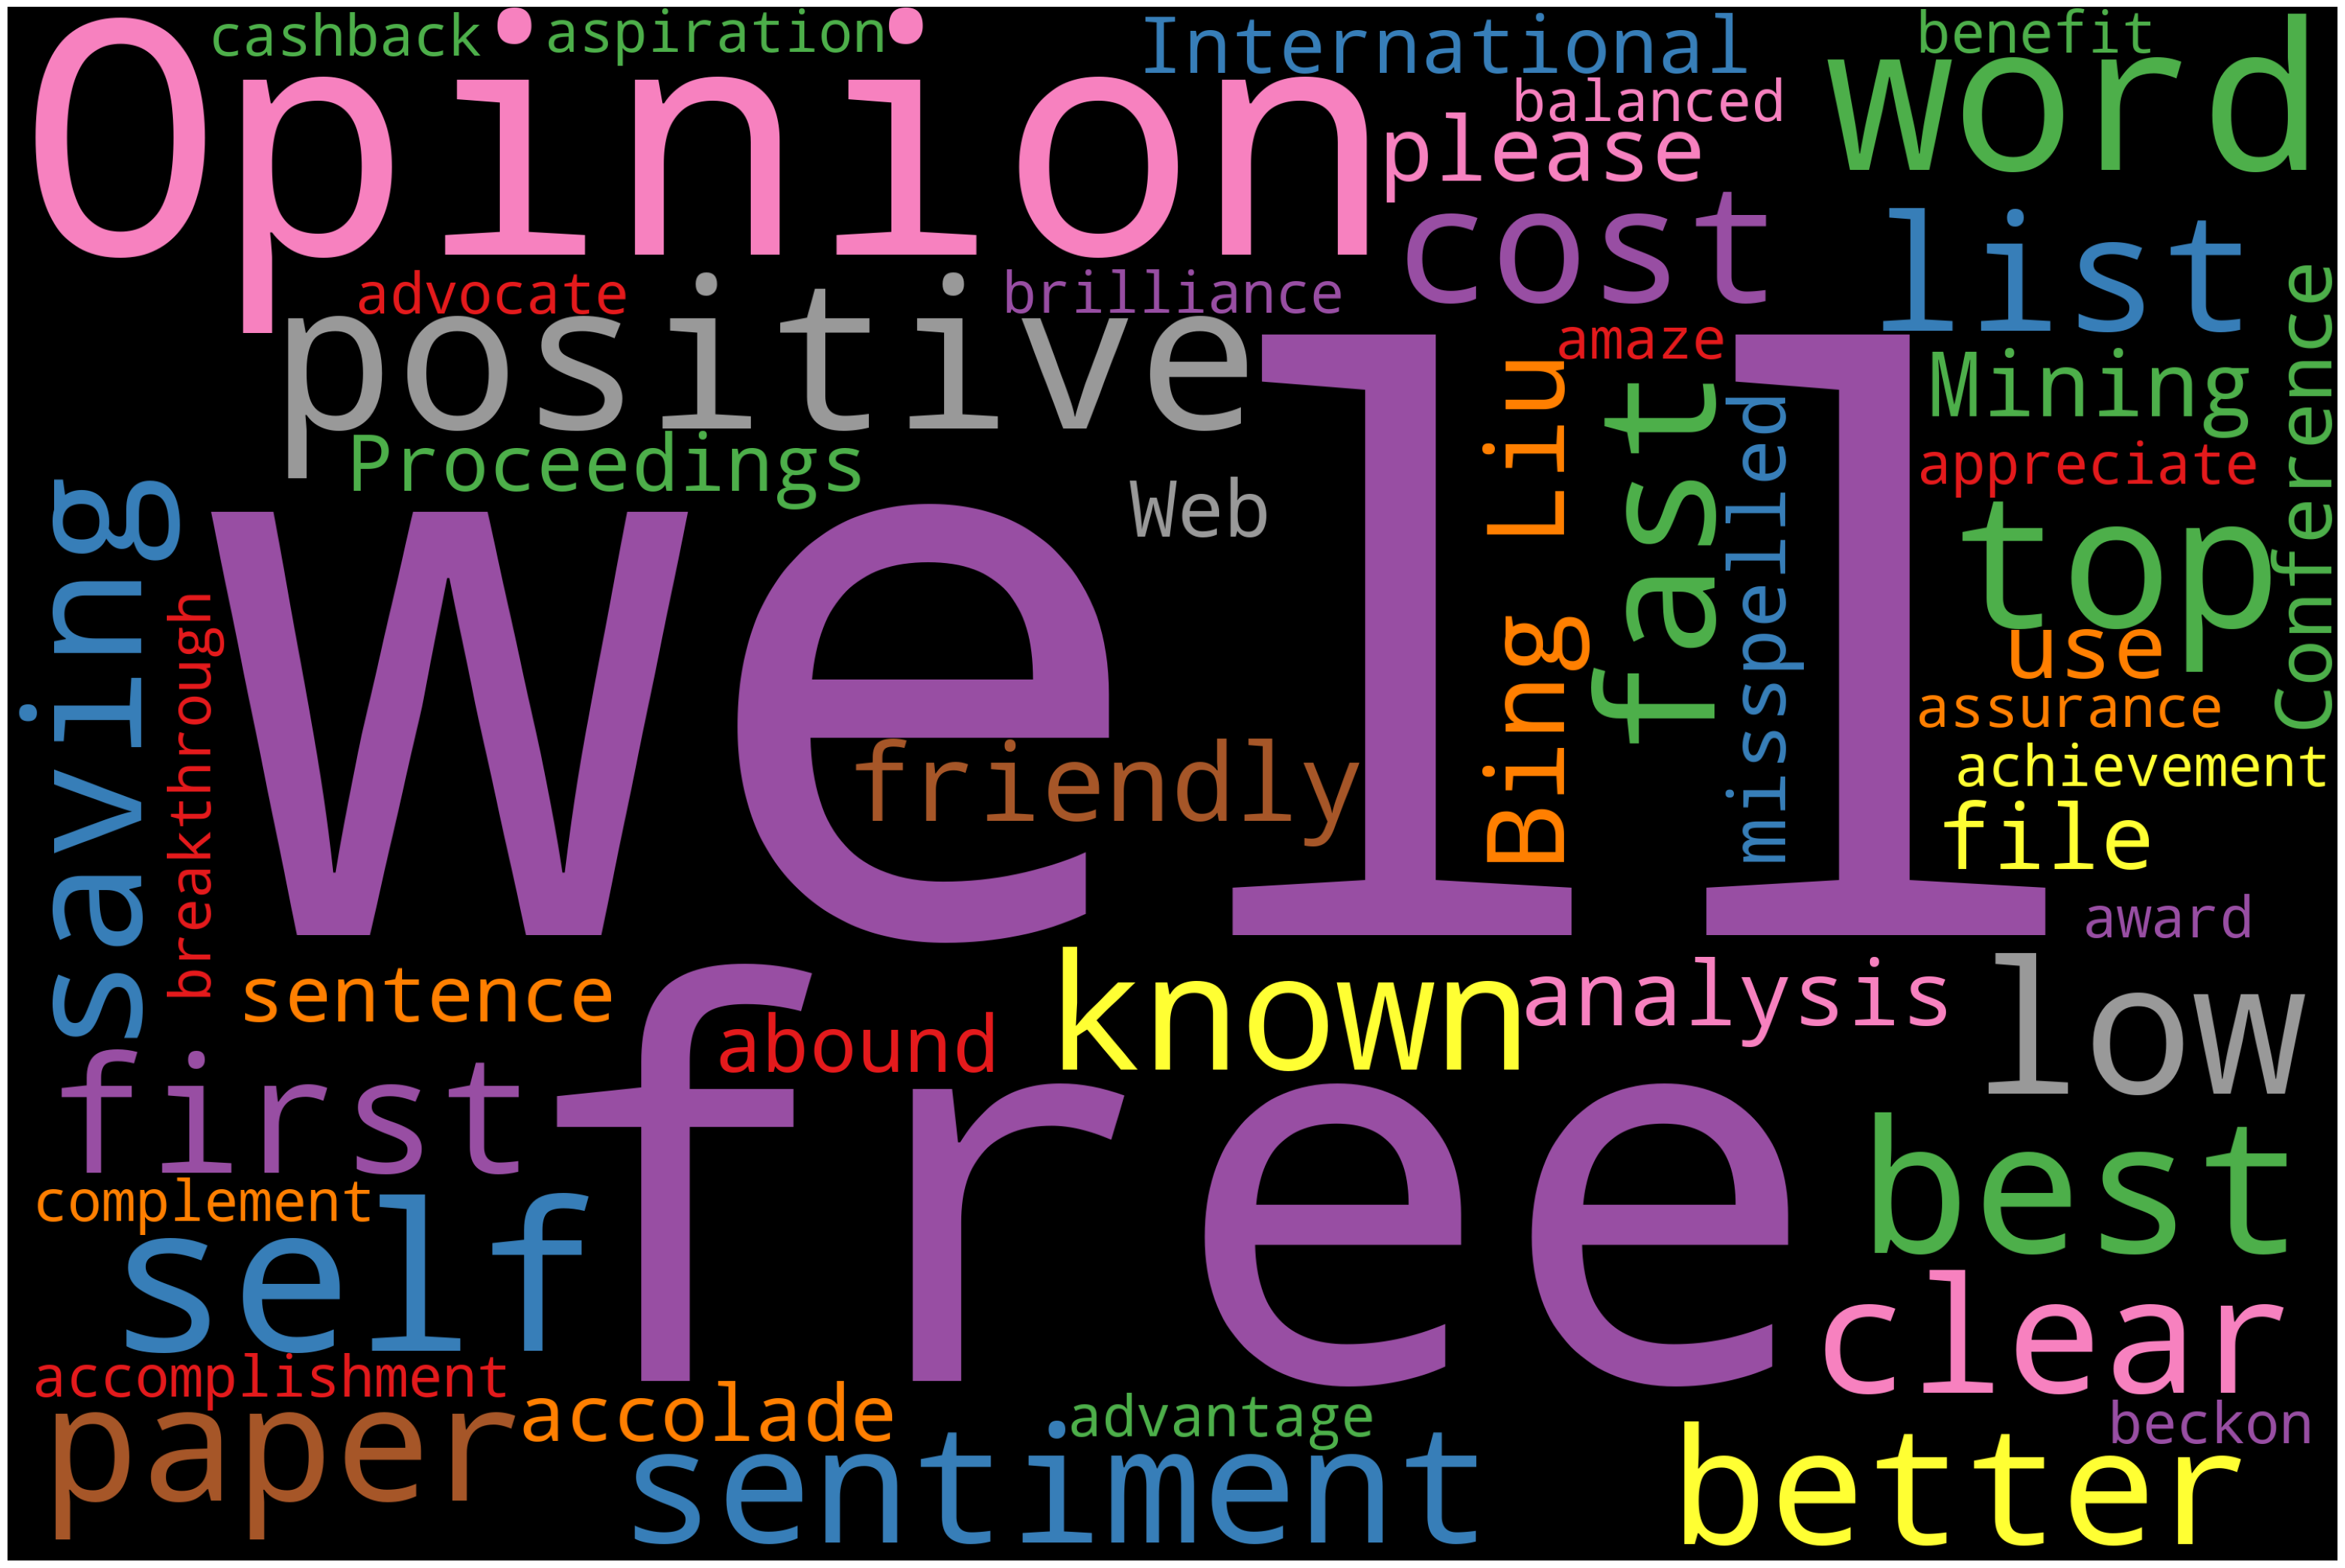

In [80]:
wordcloud=WordCloud(width = 3000, height = 2000, background_color = 'black', max_words = 50,
                   colormap = 'Set1').generate(positive)
plot_cloud(wordcloud)

#### word cloud for negative words

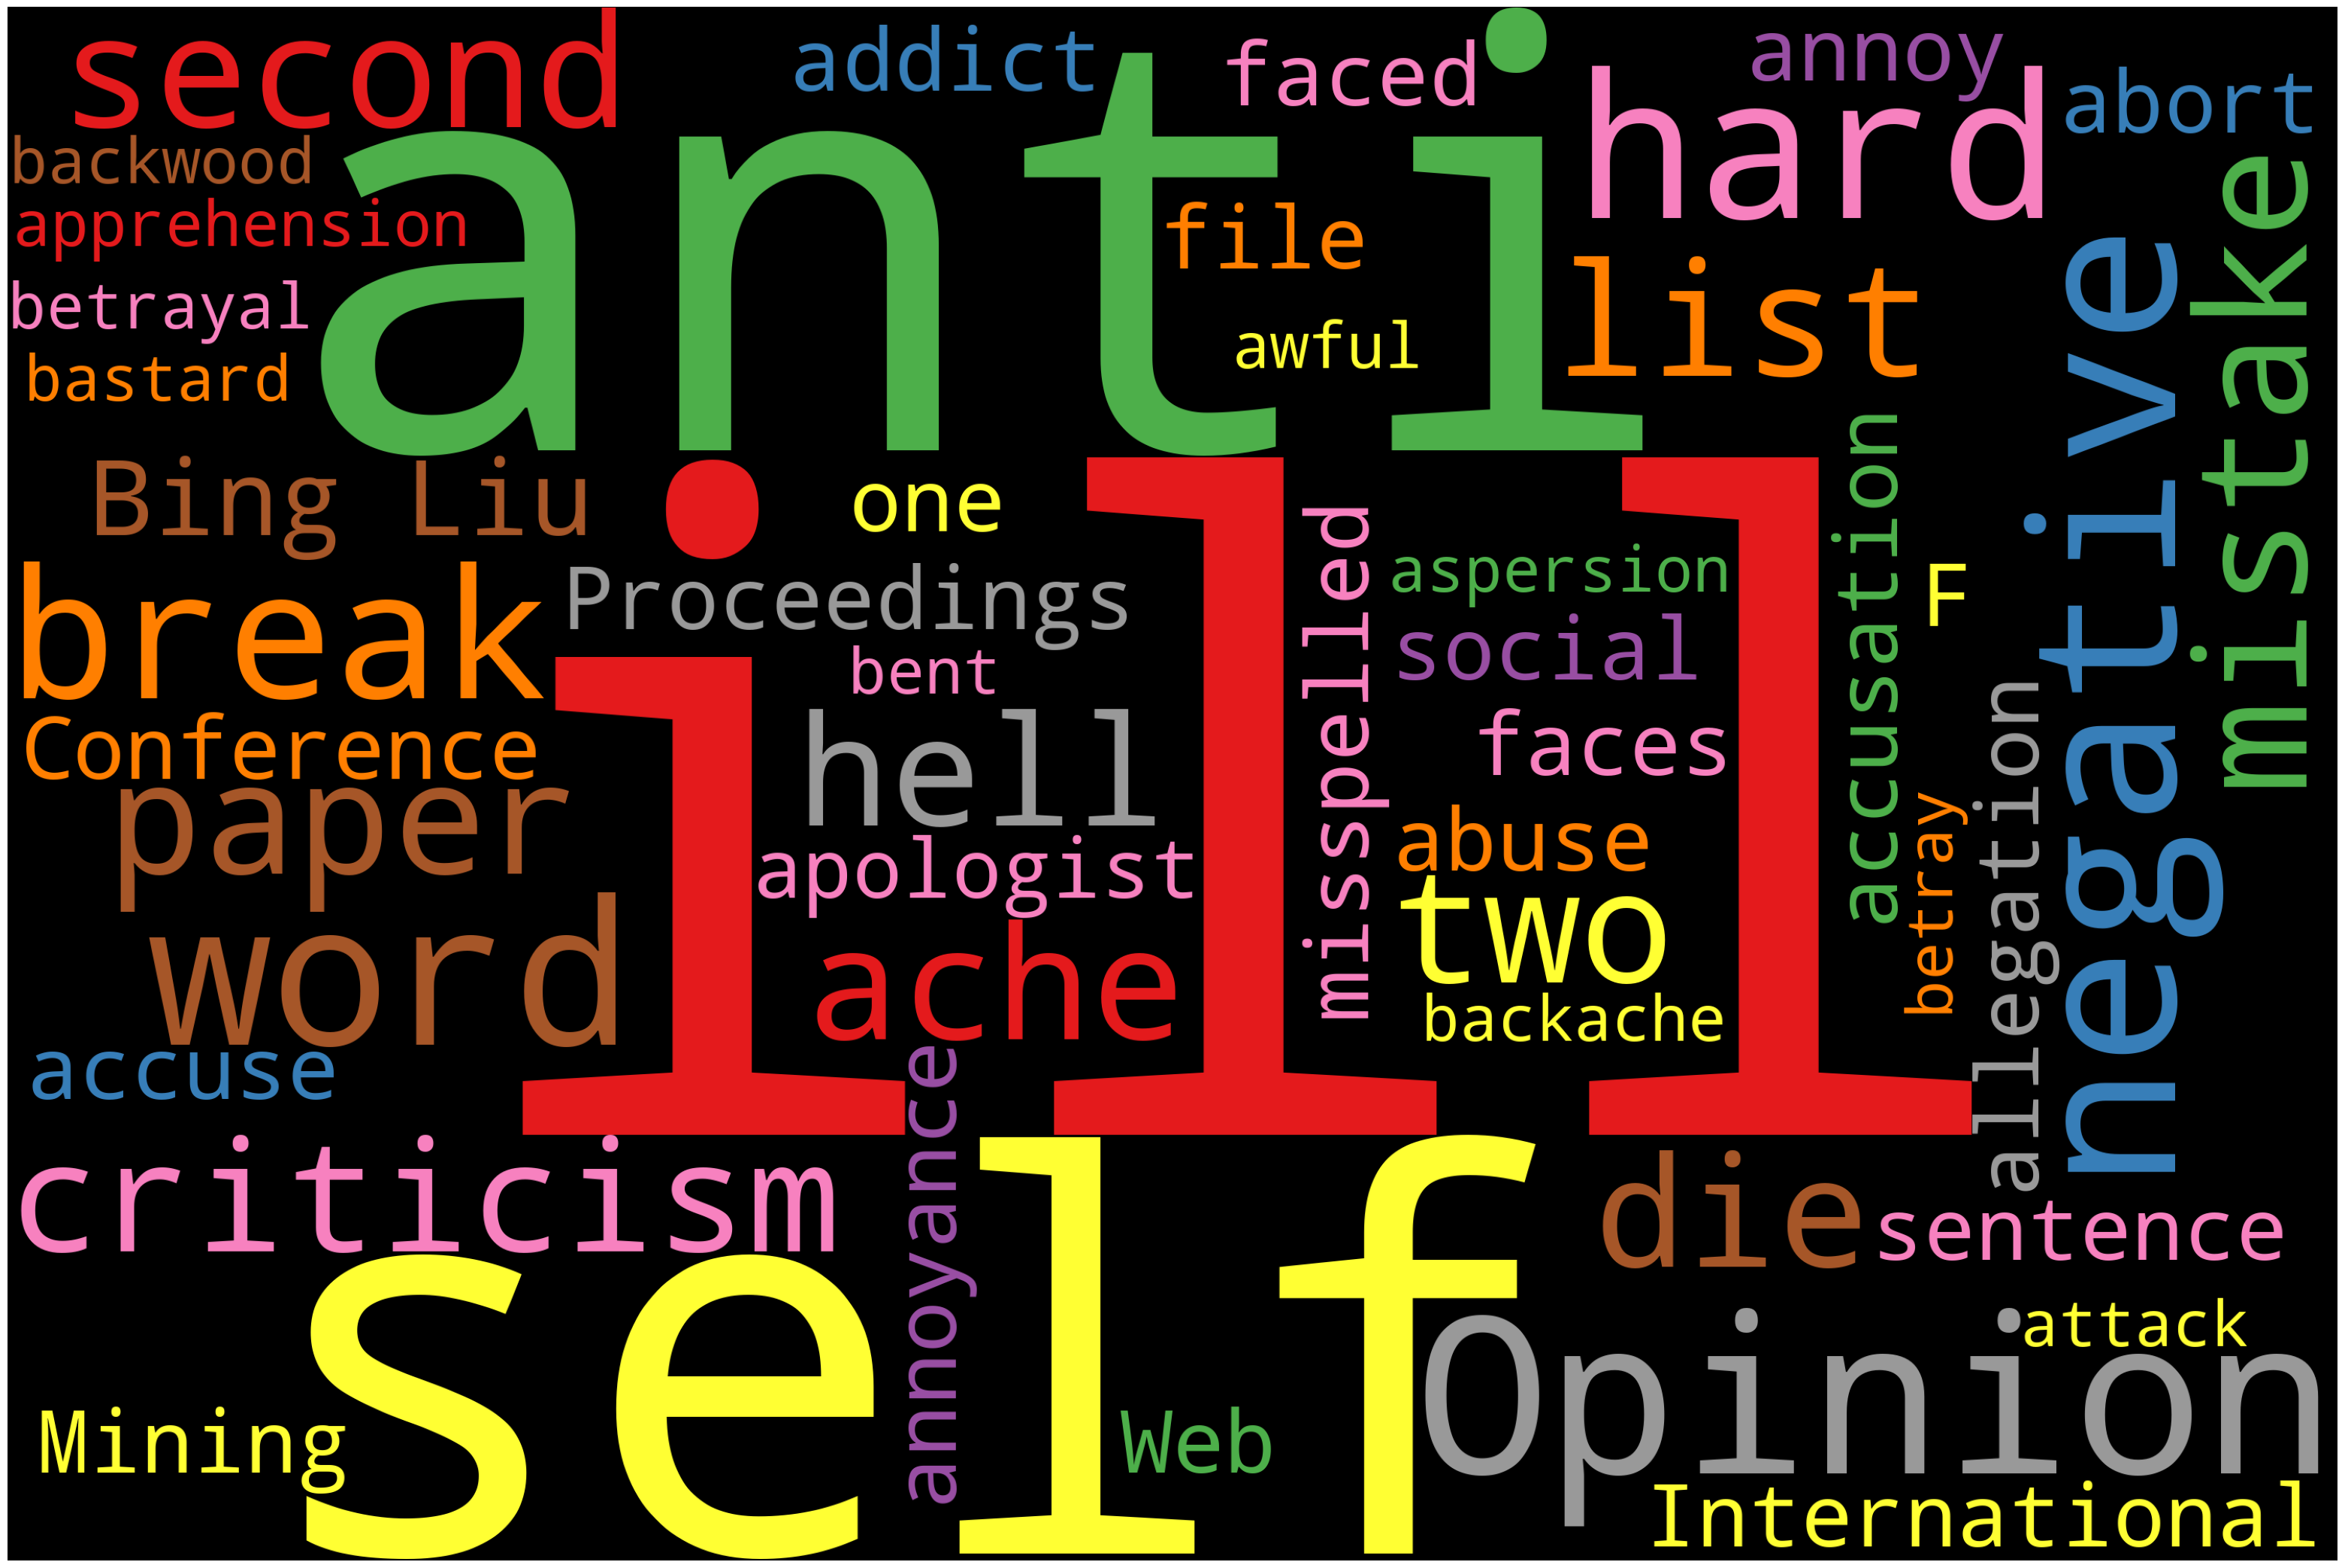

In [81]:
wordcloud=WordCloud(width = 3000, height = 2000, background_color = 'black', max_words = 50,
                   colormap = 'Set1').generate(negative)
plot_cloud(wordcloud)

#### word cloud for clean text

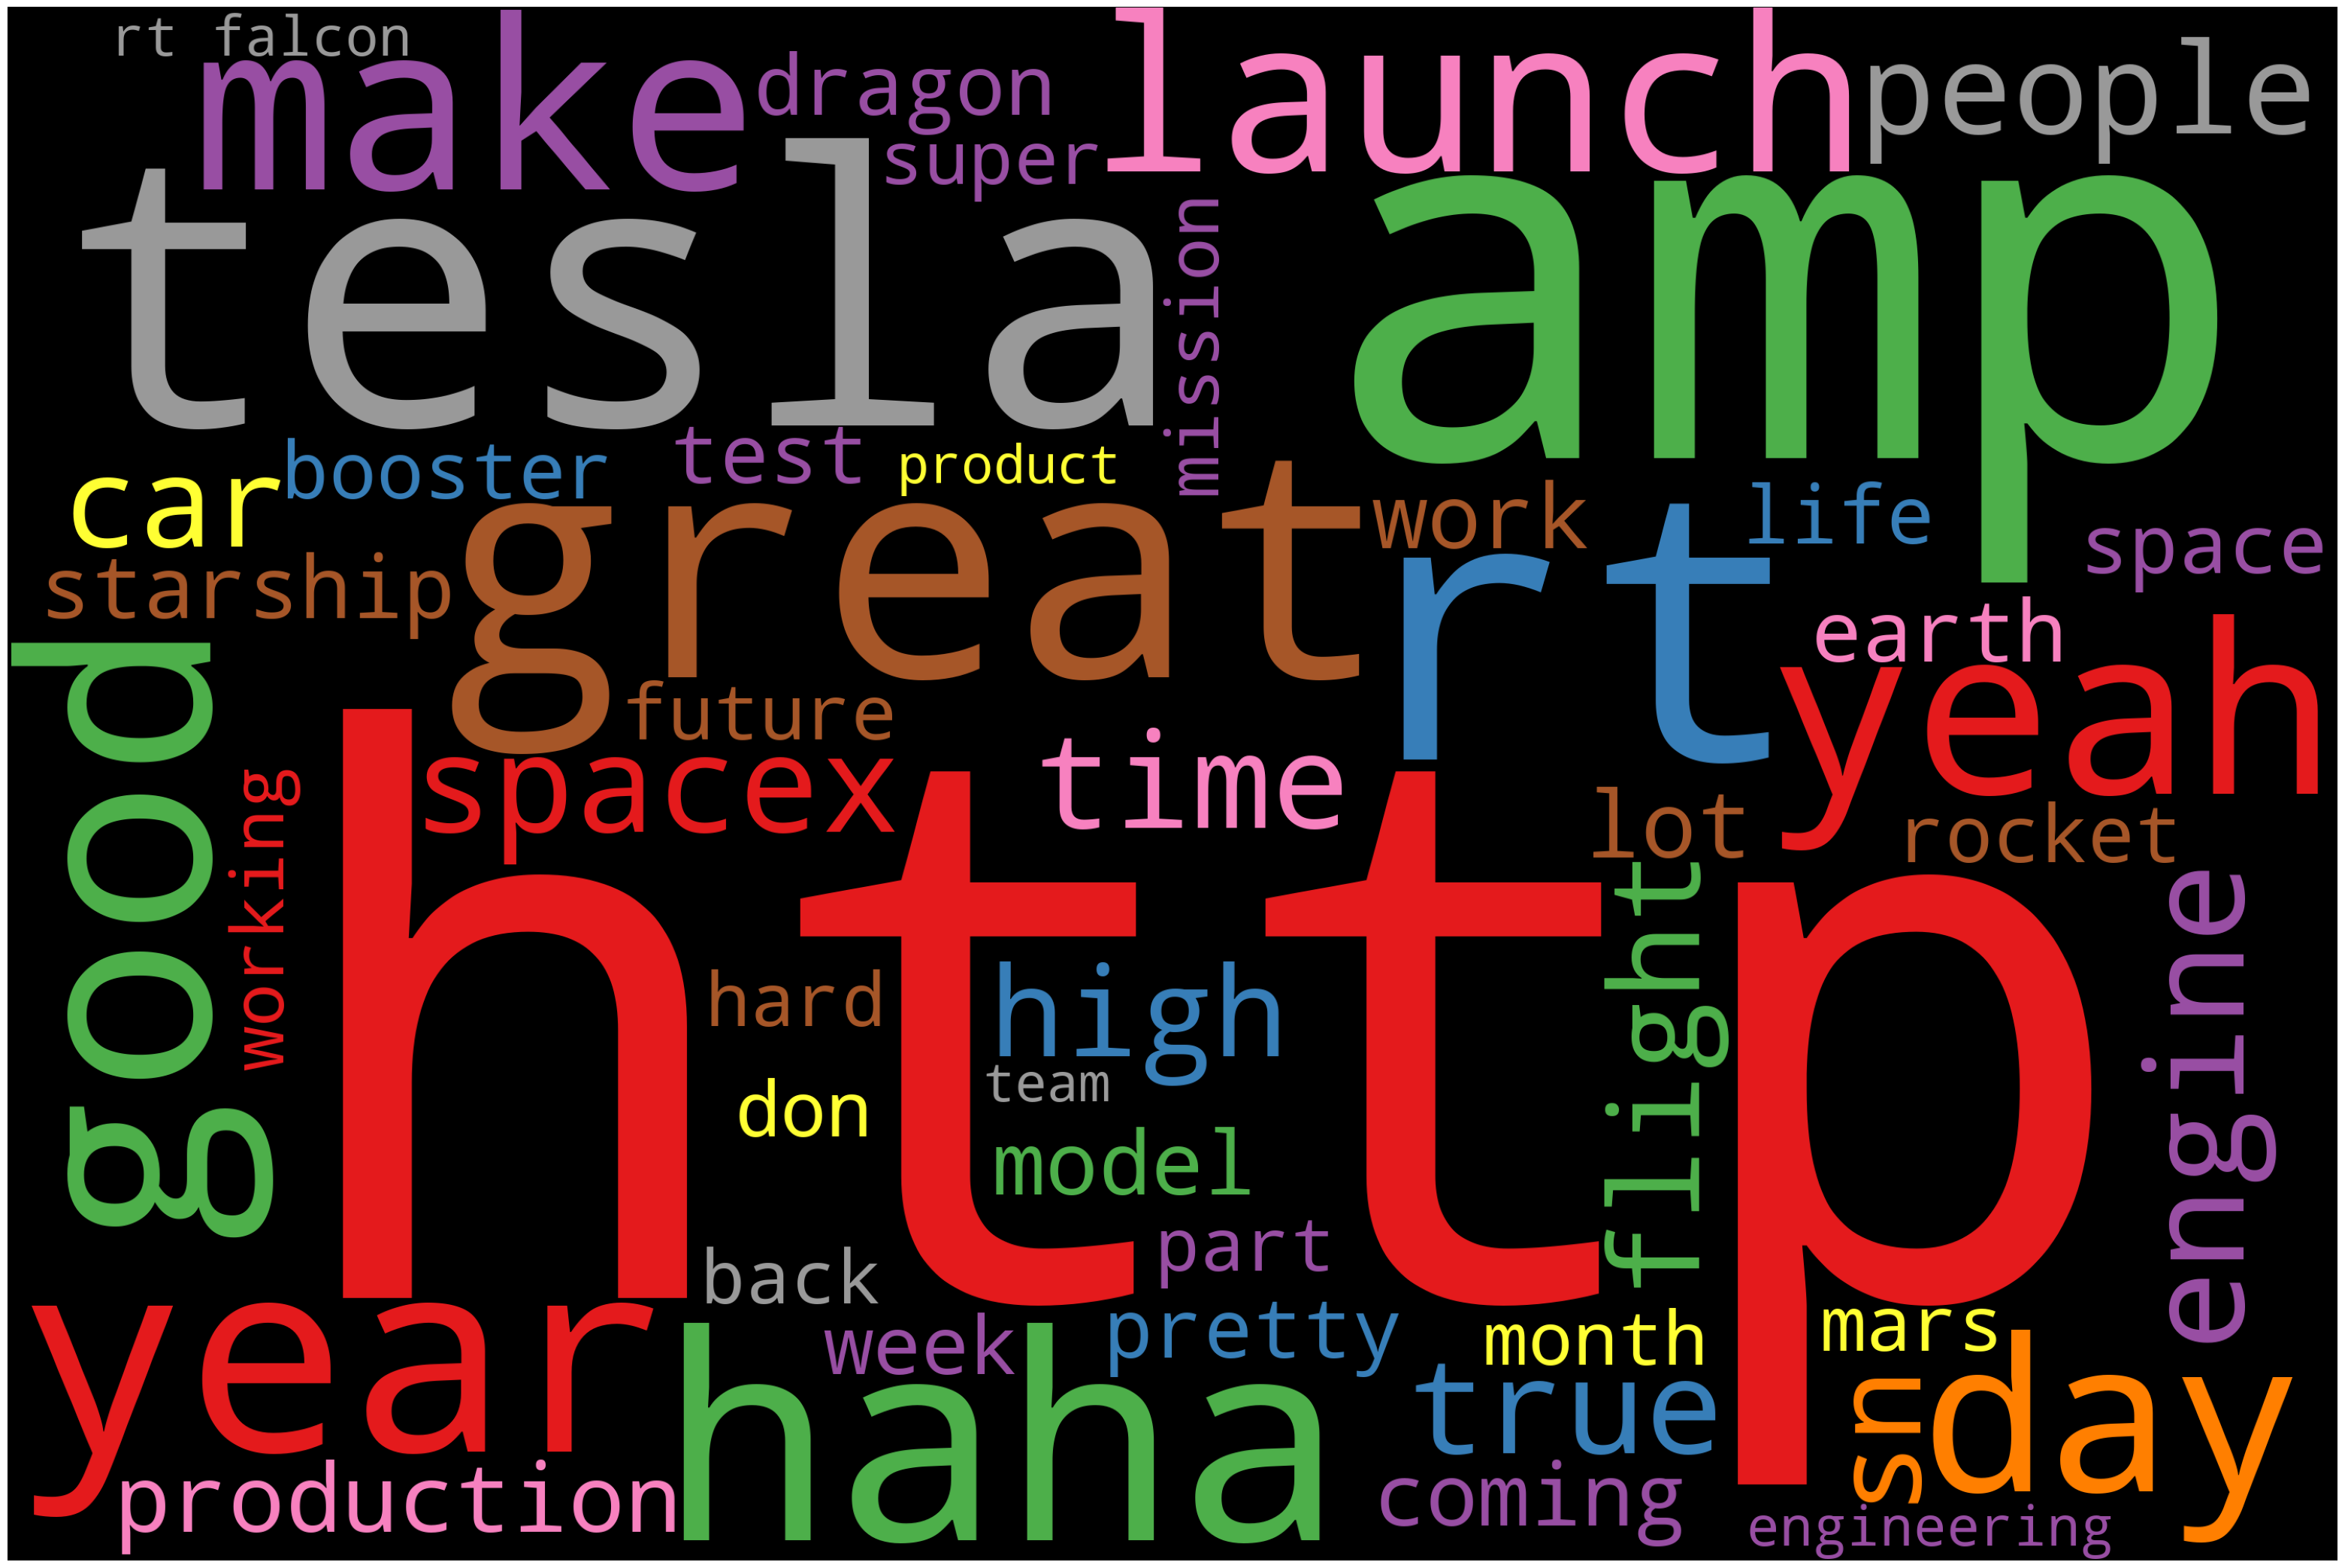

In [82]:
wordcloud=WordCloud(width = 3000, height = 2000, background_color = 'black', max_words = 50,
                   colormap = 'Set1', stopwords = new_SW).generate(tweets_text)
plot_cloud(wordcloud)